In [1]:
import numpy as np
import pandas as pd
import json as js

In [2]:
js_obj = open("F:\CLASS NOTES\mini project\MiniProject (1)\MiniProject\DataSet\Input.json")
data = js.load(js_obj)    #now you can use data as a normal dict:

#other method can be use to read json file
#data=js.loads(js_obj.read())

data

{'InputPath': ['C:/Development/TradingSystemDev/FolderWithInputFiles'],
 'TradeSplitterFiles': ['Trades_Calculation_0m-3m',
  'Trades_Calculation_0m-6m',
  'Trades_Calculation_0m-12m'],
 'OutputPath': 'C:/Development/TradingSystemDev/FolderWithOutputFiles/',
 'DataFrameFilters': [{'EntrySeconds': 'Maximum', 'Maximum': '420'},
  {'PositionType': 'Equals', 'Equals': 'Short'},
  {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'},
  {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}],
 'DependentVariable_Classification': 'WinTrade',
 'DependentVariable_Regression': 'PercentageProfit',
 'IndependentVariables': 'EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat',
 'OptimizationParameter': 'Sum(NetProfit)'}

In [3]:
for (k,v) in data.items():
    print("key: " + k)
    print("value: " + str(v))

key: InputPath
value: ['C:/Development/TradingSystemDev/FolderWithInputFiles']
key: TradeSplitterFiles
value: ['Trades_Calculation_0m-3m', 'Trades_Calculation_0m-6m', 'Trades_Calculation_0m-12m']
key: OutputPath
value: C:/Development/TradingSystemDev/FolderWithOutputFiles/
key: DataFrameFilters
value: [{'EntrySeconds': 'Maximum', 'Maximum': '420'}, {'PositionType': 'Equals', 'Equals': 'Short'}, {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'}, {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}]
key: DependentVariable_Classification
value: WinTrade
key: DependentVariable_Regression
value: PercentageProfit
key: IndependentVariables
value: EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat
key: OptimizationParameter
value: Sum(NetProfit)


In [4]:
df = pd.DataFrame([data])
df

,DataFrameFilters,DependentVariable_Classification,DependentVariable_Regression,IndependentVariables,InputPath,OptimizationParameter,OutputPath,TradeSplitterFiles
0,"[{'EntrySeconds': 'Maximum', 'Maximum': '420'}...",WinTrade,PercentageProfit,"EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1Mi...",[C:/Development/TradingSystemDev/FolderWithInp...,Sum(NetProfit),C:/Development/TradingSystemDev/FolderWithOutp...,"[Trades_Calculation_0m-3m, Trades_Calculation_..."


# Step 1: Concate all file in one

In [5]:
import glob

In [6]:
df = pd.concat(map(pd.read_csv, glob.glob("F:/CLASS NOTES/mini project/MiniProject (1)/MiniProject/DataSet/*.csv")))
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (116,117,129,137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (116,121,129,132,137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
0,MU,Long,1000,20180601,20180601,09:30:25.511,09:31:00.124,00:00:34.6125240,58.90,58.918,...,GpUp,PH,PL,-8.636364,54.545455,PHd10,PLumx,9,3.3,-0.017364
1,SLS,Long,1000,20180601,20180601,09:30:15.393,09:31:13.318,00:00:57.9251340,6.95,6.350,...,GpUp,IH,PL,2.207358,38.929766,PHu10,PLumx,-300,2703.6,0.193050
2,MU,Short,-1000,20180601,20180601,09:31:44.187,09:32:26.567,00:00:42.3794710,58.55,58.546,...,GpUp,PH,PL,-27.870968,43.870968,PHdmx,PLumx,2,4.2,-0.017364
3,MU,Short,-1000,20180601,20180601,09:31:32.263,09:32:51.307,00:01:19.0436280,58.67,58.668,...,GpUp,PH,PL,-19.128713,44.178218,PHdmx,PLumx,1,4.1,-0.017364
4,MU,Short,-1000,20180601,20180601,09:31:32.263,09:32:51.307,00:01:19.0436280,58.67,58.668,...,GpUp,PH,PL,-19.128713,44.178218,PHdmx,PLumx,1,4.1,-0.017364


In [7]:
df.shape

(102373, 188)

# step 2: Dataframes filter functions

In [8]:
df['EntrySeconds'].max()    # should be max 420

2398.7129999999997

In [9]:
df['PositionType'].unique()    # should be short only

array(['Long', 'Short'], dtype=object)

In [10]:
df['Float'].min()   # should be 0

22610

In [11]:
df['Float'].max()   # condition shoud be 500000000

4350000000

In [12]:
df['EntryPrice'].max()    # should be 180

673.0

In [13]:
df['EntryPrice'].min()   # should be 20

1.0

In [14]:
df1 = df[(df['EntrySeconds']<420) & (df['PositionType'] == 'Short') & 
         (df['Float']>0) & (df['Float']<500000000) & 
         (df['EntryPrice']>20) & (df['EntryPrice']<180)]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 10 to 28840
Columns: 188 entries, Symbol to IntradayOpenCurrentGapDifPerc
dtypes: bool(2), float64(83), int64(29), object(74)
memory usage: 15.1+ MB


In [16]:
df1.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
10,ANF,Short,-1000,20180601,20180601,09:33:41.107,09:34:09.560,00:00:28.4533280,22.13,21.958,...,GpDn,PH,IL,-54.968553,-2.012579,PHdmx,PLd10,86,63.4,0.209293
11,ANF,Short,-1000,20180601,20180601,09:33:41.107,09:34:09.560,00:00:28.4533280,22.13,21.958,...,GpDn,PH,IL,-54.968553,-2.012579,PHdmx,PLd10,86,63.4,0.209293
14,FTI,Short,-1000,20180601,20180601,09:32:45.780,09:35:00.029,00:02:14.2488710,31.92,31.902,...,GpUp,PH,PL,-24.590164,1.639344,PHdmx,PLu10,9,9.7,0.160514
16,FTI,Short,-1000,20180601,20180601,09:32:59.857,09:35:09.384,00:02:09.5274150,31.82,32.040,...,GpUp,PH,IL,-30.306122,-3.857143,PHdmx,PLd10,-110,10.0,0.160514
31,BIG,Short,-1000,20180601,20180601,09:36:02.263,09:42:39.132,00:06:36.8692150,36.56,36.624,...,GpDn,PH,PL,-118.703390,8.186441,PHdmx,PLu10,-32,101.7,0.097680


In [17]:
df1.shape

(10600, 188)

# Step 3: Heatmap

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
X = df1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume',
         'IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
X.head()

,EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat
10,221.107,65920000,24.0,1260153,1368764,-4.981164,-31.22%,7.33,30.60
11,221.107,65920000,24.0,1260153,1368764,-4.981164,-31.22%,7.33,30.60
14,165.780,421140000,1.6,194735,286883,3.370787,-32.72%,2.79,2.34
16,179.857,421140000,1.6,194735,297444,3.370787,-32.72%,2.79,2.34
31,362.263,39750000,50.0,735074,1199885,-10.036630,-36.29%,7.64,21.41


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 10 to 28840
Data columns (total 9 columns):
EntrySeconds                        10600 non-null float64
Float                               10600 non-null int64
Vol1MinRatioMaxPD123                10600 non-null float64
Vol1MinRatioMaxPD123_TotalVolume    10600 non-null int64
AllExchangesVolume                  10600 non-null int64
IntradayCurrentMarketGapPerc        10600 non-null float64
Fund52WeekChange                    10600 non-null object
FundShortRatio                      10600 non-null float64
FundShortPercofFloat                10600 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 828.1+ KB


In [21]:
X['Float'] = X.Float.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
X['AllExchangesVolume'] = X.AllExchangesVolume.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
X['Vol1MinRatioMaxPD123_TotalVolume'] = X.Vol1MinRatioMaxPD123_TotalVolume.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X['Fund52WeekChange'] = X['Fund52WeekChange'].str.replace('%','')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
for Fund52WeekChange in X:
    X['Fund52WeekChange'] = pd.to_numeric(X['Fund52WeekChange'], errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
X.head()

,EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat
10,221.107,65920000.0,24.0,1260153.0,1368764.0,-4.981164,-31.22,7.33,30.60
11,221.107,65920000.0,24.0,1260153.0,1368764.0,-4.981164,-31.22,7.33,30.60
14,165.780,421140000.0,1.6,194735.0,286883.0,3.370787,-32.72,2.79,2.34
16,179.857,421140000.0,1.6,194735.0,297444.0,3.370787,-32.72,2.79,2.34
31,362.263,39750000.0,50.0,735074.0,1199885.0,-10.036630,-36.29,7.64,21.41


In [27]:
X.dtypes

EntrySeconds                        float64
Float                               float64
Vol1MinRatioMaxPD123                float64
Vol1MinRatioMaxPD123_TotalVolume    float64
AllExchangesVolume                  float64
IntradayCurrentMarketGapPerc        float64
Fund52WeekChange                    float64
FundShortRatio                      float64
FundShortPercofFloat                float64
dtype: object

In [28]:
np.where(X.isna())

(array([  298,   506,   719, ..., 10579, 10582, 10585], dtype=int64),
 array([6, 6, 6, ..., 6, 6, 6], dtype=int64))

In [29]:
col_mask = X.isnull().any(axis=0)
col_mask

EntrySeconds                        False
Float                               False
Vol1MinRatioMaxPD123                False
Vol1MinRatioMaxPD123_TotalVolume    False
AllExchangesVolume                  False
IntradayCurrentMarketGapPerc        False
Fund52WeekChange                     True
FundShortRatio                      False
FundShortPercofFloat                False
dtype: bool

In [30]:
row_mask = X.isnull().any(axis=1)


In [31]:
X1 = X.fillna(X['Fund52WeekChange'].mean())

In [32]:
Y = df1[['PercentageProfit','WinTrade']]
Y.head()

,PercentageProfit,WinTrade
10,0.003901,1
11,0.003901,1
14,0.000282,1
16,-0.003445,0
31,-0.000875,0


In [33]:
Y1 =df1[['PercentageProfit']]
Y1 = Y1.fillna(Y1.mean())
Y1.head()


,PercentageProfit
10,0.003901
11,0.003901
14,0.000282
16,-0.003445
31,-0.000875


In [34]:
Y2 = df1[['WinTrade']]
Y2.head()

,WinTrade
10,1
11,1
14,1
16,0
31,0


In [35]:
Z = df1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume',
         'IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]


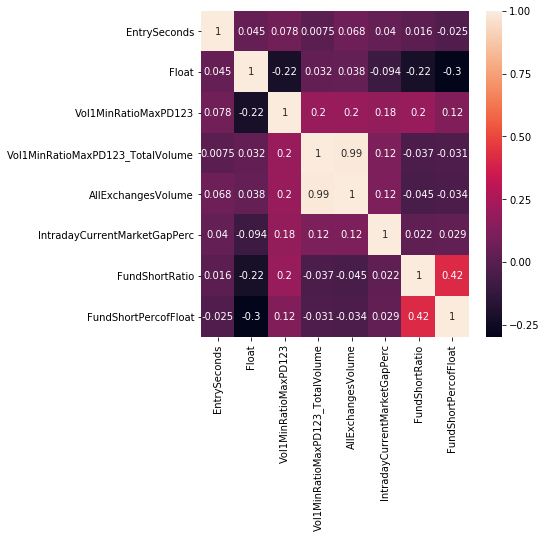

In [36]:
plt.figure(figsize=(6,6))
heat = Z.corr()
sns.heatmap(heat, annot=True)
plt.show()

# Step 4: Regression Model(Y1)

# Feature Selection

In [37]:
import sklearn 
from sklearn.feature_selection import RFE

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
rfe = RFE(model,3)

In [42]:
fit =rfe.fit(X1, Y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print("no. of feature %s" % (fit.n_features_))
print("Selected feature %s" %(fit.support_))
print("Feature Ranking %s" %(fit.ranking_))

no. of feature 3
Selected feature [False False False False False False  True  True  True]
Feature Ranking [3 7 4 6 5 2 1 1 1]


In [46]:
Xf = X1[['Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
Xf.head()

,Fund52WeekChange,FundShortRatio,FundShortPercofFloat
10,-31.22,7.33,30.60
11,-31.22,7.33,30.60
14,-32.72,2.79,2.34
16,-32.72,2.79,2.34
31,-36.29,7.64,21.41


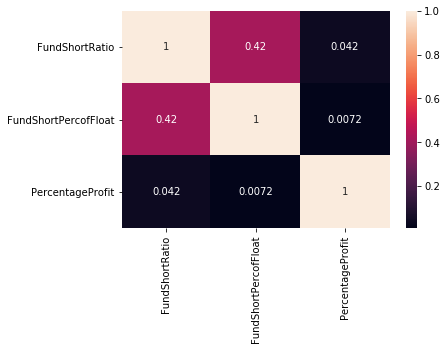

In [47]:
Z1 = df1[['Fund52WeekChange','FundShortRatio','FundShortPercofFloat','PercentageProfit']]
heat1 = Z1.corr()
sns.heatmap(heat1, annot= True)

In [48]:
reg = linear_model.LinearRegression()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
(Xf_train, Xf_test, Y1_train, Y1_test) = train_test_split(Xf,Y1, test_size = 0.40, random_state = 0)

In [51]:
model.fit(Xf_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
accuracy = model.score(Xf_test,Y1_test)
accuracy*100

-0.1394378466894608

In [53]:
Y1_pred = model.predict(Xf_test)
Y1_pred

array([[ 2.02610743e-04],
       [-9.50726486e-04],
       [-2.08472313e-04],
       ...,
       [-6.36543104e-05],
       [-5.24768129e-04],
       [ 8.10121550e-04]])

# Step 5: Logistic Regression(Y2)

In [54]:
from sklearn.model_selection import train_test_split

(Xf_train, Xf_test, Y2_train, Y2_test) = train_test_split(Xf,Y2, test_size = 0.40, random_state = 0)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logrerg = LogisticRegression()

logrerg.fit(Xf_train, Y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
Y2_pred = logrerg.predict(Xf_test)
Y2_pred.size

4240

In [58]:
from sklearn import metrics

In [59]:
cnf_met = metrics.confusion_matrix(Y2_test, Y2_pred)

In [60]:
cnf_met

array([[  11, 1796],
       [  22, 2411]], dtype=int64)

In [61]:
print("Accuracy Score: ",metrics.accuracy_score(Y2_test,Y2_pred))

Accuracy Score:  0.5712264150943396


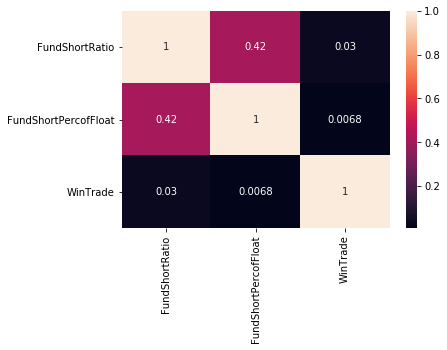

In [62]:
Z2 = df1[['Fund52WeekChange','FundShortRatio','FundShortPercofFloat','WinTrade']]
heat2 = Z2.corr()
sns.heatmap(heat2,annot = True)

# Using Decision Tree

# decision classifier

In [63]:
from sklearn import tree

In [64]:
model = tree.DecisionTreeClassifier()
model.fit(Xf, Y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
model.score(Xf,Y2)

0.7000943396226416

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
(Xf_train, Xf_test, Y2_train, Y2_test) = train_test_split(Xf,Y2, test_size = 0.40, random_state = 0)

In [68]:
model.fit(Xf_train, Y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
Y2_pred = model.predict(Xf_test)

In [70]:
from sklearn import metrics

In [74]:
cnf_met = metrics.confusion_matrix(Y2_test, Y2_pred)
cnf_met

array([[ 895,  912],
       [ 497, 1936]], dtype=int64)

In [75]:
print("Accuracy Score: ",metrics.accuracy_score(Y2_test,Y2_pred))

Accuracy Score:  0.667688679245283


# decision regression

In [76]:
from sklearn import tree

In [77]:
model = tree.DecisionTreeRegressor()

In [78]:
model.fit(Xf,Y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [79]:
model.score(Xf,Y1)

0.309540528036485

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
(Xf_train, Xf_test, Y1_train, Y1_test) = train_test_split(Xf,Y1, test_size = 0.40, random_state = 0)

In [82]:
std_Y1_pred = model.predict(Xf_test)

In [83]:
print("Accuracy Score: ",model.score(Xf_test,Y1_test))

Accuracy Score:  0.2919569524107476


# improve accuracy by Standard Scaler


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler().fit(Xf_train)

In [86]:
standardized_Xf_train = scaler.transform(Xf_train)

In [87]:
standardized_Xf_test = scaler.transform(Xf_test)

# tree regressor after standerdization

In [89]:
from sklearn import tree

In [90]:
model = tree.DecisionTreeRegressor()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
model.fit(standardized_Xf_train,Y1_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [93]:
Y1_pred = model.predict(standardized_Xf_test)

In [94]:
print("Accuracy Score: ",model.score(standardized_Xf_test,Y1_test))

Accuracy Score:  0.15620615485151323


# tree classifier after standerdization

In [95]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [96]:
model.fit(standardized_Xf_train,Y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')